# Лабораторная работа #3

## Цель работы 

Знакомство и освоение работы с моделью машинного обучения типа многослойный перцептрон для решения задачи регрессии с использованием библиотеки Tensorflow.

## Ход работы 

1. Разобрать этапы базового примера - Проверки работы нейросети

2. Загрузка данных

  1) Выполнить загрузку файла с подготовленным набором данных (отчищенный от пропусков и выбросов для целевой и независимых переменных) в таблицу _df_

  2) Объявить список независимых и целевой переменных

  3) Оставить в таблице данных _df_ столбцы, относящиеся только к списку независимых и целевой переменных



2. Выполнить процедуру НОРМАЛИЗАЦИИ данных и сохранить в отдельную таблицу

  1) Отделить X от Y исходной таблицы и сформировать новые dfX и dfY

  2) Используя класс MinMaxScaler получить нормализованые версии dfX и dfY и сохранить их в dfXNorm и dfYNorm соответственно

  2) Для X и Y построить гистограммы распределения нормализованных и исходных значений 
  

3. Сформировать обучающую и проверочную части:

  1) На основе нормализированой выборки сформировать _xNorm__train_ , _xNorm__test_ , _yNorm__train_ , _yNorm__test_


4. Определить структуру четырех моделей (кол-во узлов на входных, выходных и скрытых слоях).
```
m1 - два вход -> один выход (2->1)
m2 - два входа -> скрытые слои -> один выход (пример 2->...->...->1)
m3 - несколько входов -> один выход (пример 5->1)
m4 - несколько входов -> скрытые слои -> один выход (пример 5->...->...->1)
```
 
5. Для каждой модели (m1, m2, m3, m4) нейронной сети:

  1) Провести процедуру обучения сети, во время которой фиксировать значения оценок потерь
    
  2) Получить значения целевой переменной "yNorm" на проверочном(TEST) наборе
    
  3) Получить значения метрик точности на проверочном(TEST) наборе: R2(коэфф. детерминации) и RMSE (среднеквадратичное отклонение) 
    
  4) Построить диаграмму рассеяния вычисленных значений Y_pred от проверочных значений Y_test
    
  5) Построить гистограмму остатков (разностей между Y_pred и Y_test)

  6) Для моделей m1 и m2: 
      * Построить 3d график зависимости вычисленных значений Y_pred от объясняющих признаков x1 и x2
    
  8) Для модели m1 и m3:
      * Получить весовые коэфф. w и bias
         
6. Составить сводную таблицу и провести сравнение точности полученых моделей в зависимости от структуры модели

7. Сделать выводы о влиянии структуры на точность и эффектовности применения нейронных сетей на вашем наборе данных 


## Содержание отчета
<font color='red'>Название отчета должно быть в формате:
<br>АВТ-9xx_ЛР-xx_Фамилия1_Фамилия2
</font>

1. Список выбранных целевой переменной 'y' и независимых признаков 'x1, x2, x3, ...'

2. Описание процесса загрузки и НОРМАЛИЗАЦИИ с выводом значений таблиц

3. Гистограммы распределения исходных и шкалированых значений для целевой переменной 'y' и независимых признаков 'x1, x2, x3, ...'

4. Этапы построения и оценки  точности моделей (m1, m2, m3, m4)
  
5. Сводная таблица оценок точности с указанием структуры модели

6. Выводы по результатам сравнительного анализа полученных регрессионных моделей

## Рекомендуемые материалы

- [Eng][Видео] Принцип и этапы работы нейронных сетей, URL: https://www.youtube.com/playlist?list=PLZHQObOWTQDNU6R1_67000Dx_ZCJB-3pi
- [Eng]Примеры и приемы работы с Pytorch #1, URL: https://github.com/yunjey/pytorch-tutorial
- [Eng]Примеры и приемы работы с Pytorch #2, URL: https://github.com/python-engineer/pytorchTutorial


- [Eng]Страница курса CS231n Convolutional Neural Networks for Visual Recognition:
  - Введение и архитектура, URL: https://cs231n.github.io/neural-networks-1/
  - Обработка данных, URL: https://cs231n.github.io/neural-networks-2/
- [Eng]Сравнение и обзор функций активации,  URL: https://arxiv.org/pdf/1710.05941.pdf


  
- [Ru]Открытый курс машинного обучения. Тема 4. Линейные модели классификации и регрессии, URL: https://habr.com/ru/company/ods/blog/323890/
- [Ru]Дьяконов, Линейная регрессия++, URL: https://dyakonov.org/2019/10/31/%d0%bb%d0%b8%d0%bd%d0%b5%d0%b9%d0%bd%d0%b0%d1%8f-%d1%80%d0%b5%d0%b3%d1%80%d0%b5%d1%81%d1%81%d0%b8%d1%8f/
- [Ru]Дьяконов,Метрики оценки точности, URL: https://alexanderdyakonov.files.wordpress.com/2018/10/book_08_metrics_12_blog1.pdf




# Подключение библиотек

Для выполнения работы потребуется установить библиотеки:
- tensorflow - для работы с нейронными сетями (требует 400 МБ интернет трафика) 
- plotly - для отображения 3d графиков

Команда для установки:
```
> python -m pip install --upgrade pip
> pip3   install --upgrade tensorflow plotly
```

In [5]:
import tensorflow as tf

In [6]:
# Python 3.8
import pandas as pd
import numpy  as np

from sklearn import linear_model
from sklearn import ensemble
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import cm
import seaborn as sns

In [7]:
from IPython.display import clear_output

In [8]:
import plotly.graph_objects as go

In [9]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
#tf.debugging.set_log_device_placement(False)
#tf.config.set_soft_device_placement(False)

Num GPUs Available:  0


## Объявление функций

Для повышения повторяемости кода и повышения уровня читаемости объявим несколько функций с уже знакомыми операциями

In [10]:
def PLOT34(y_test, y_pred):
    '''
    Функция построения графиков
    :param y_test: - проверочные значения целевой переменный
    :param y_pred: - вычисленные значения целевой переменный
    '''
    plt.figure(figsize=(12,6))
    
    # == Диаграмма рассеяния вычисленных значений ==
    # создать первое полотно 121: 1-строк, 2-столбцов, 1-индекс текущего полотна в сетке
    plt.subplot(121)
    plt.scatter(y_test, y_pred,  alpha=0.1)
    plt.scatter(y_test, y_test,  alpha=0.1)
    plt.title('Диаграмма рассеяния вычисленных значений');
    plt.xlabel('Проверочное Y')
    plt.ylabel('Вычисленное Y')

    
    # == Диаграмма рассеяния ошибок ==
    # создать первое полотно 121: 1-строк, 2-столбцов, 2-индекс текущего полотна в сетке
    plt.subplot(122)
    plt.scatter(y_test, (y_test - y_pred)**2,  alpha=0.1)
    plt.title('Диаграмма рассеяния квадрата абсолютной ошибки')
    plt.xlabel('Проверочное Y')
    plt.ylabel('Квадрат абсолютной ошибки')
#--------------------------------------------------------------------------

In [11]:
def GET_METRICS_SINGLE(y_test, y_pred):
    '''
    Вычисление и вывод метрик: MAE, RMSE, R2.
    На основе сравнения проверочных и вычисленных.
    :param y_test: - проверочные значения целевой переменный
    :param y_pred: - вычисленные значения целевой переменный
    '''
    mae  = metrics.mean_absolute_error        (y_test, y_pred)
    mse  = metrics.mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2   = metrics.r2_score                   (y_test, y_pred)

    print ("MAE : {:>9,.3f} (средняя абсолютная ошибка)".format              ( mae ))
    print ("MSE : {:>9,.6f} (среднеквадратичная ошибка)".format( mse ))
    print ("RMSE: {:>9,.6f} (кв. корень из среднеквадратичной ошибки)".format( rmse ))
    print ("R2  : {:>9,.3f} (коэфф. детерминации)".format                    ( r2 ))
#--------------------------------------------------------------------------

In [12]:
def my3dplot (  x_train, y_train,  isDrawTrain,
                x_test, y_test,    isDrawTest,
                y_pred,            isDrawPred,
                x1Name, x2Name, y_targetName):
    """
    Отображает 3д график исходных и вычисленых точек
    
    x_test, y_test, x_train, y_train - обучающиа и проверочная чатсти исходной таблицы  (тип DataFrame)
    y_pred, - вычисленные значения (тип DataFrame)
    x1Name, x2Name - имя столбца для x1 и x2 (тип стрококвый)
    y_targetName   - имя столбца целевого    (тип стрококвый)
    
    """
    sTransparencyVal  = 0.9 # Прозрачность поверхности вычисленных значений y_pred
    mTransparencyVal  = 0.3 # Прозрачность точек графика train, test
    mSize = 5   # Размер точки

    # Построить поверхность соотвествующую вычисленным значениям
    trace_LinModel = go.Mesh3d(
                       x= x_test[ x1Name ].values,
                       y= x_test[ x2Name ].values,
                       z= y_pred.reshape(-1), # <-- Вычисленные
                       name="Вычисленный",
                       opacity=sTransparencyVal,
                       #alphahull=1,
                       color='rgba(100,244,100,0.6)',
                      )
    
    # Построить рассеяние обучающих точек 
    trace_Train = go.Scatter3d (x= x_train[ x1Name ].values, # <-- Обучающие
                                y= x_train[ x2Name ].values, # <-- Обучающие
                                z= y_train[ y_targetName ].values,     # <-- Обучающие
                                name="Обучающие",
                                mode='markers',
                                marker=dict(
                                   size=mSize,
                                   color=y_train[ y_targetName ].values, # Источник значений цвета <-- Обучающие
                                   colorscale='Blues',        # Название цветовой шкалы # _r
                                   opacity=mTransparencyVal
                                ))
    
    # Построить рассеяние проверочных точек 
    trace_Test = go.Scatter3d (x= x_test[ x1Name ].values,# <-- Проверочные
                               y= x_test[ x2Name ].values,# <-- Проверочные
                               z= y_test[ y_targetName ].values,    # <-- Проверочные
                               name="Проверочные",
                               mode='markers',
                               marker=dict(
                                  size=mSize,
                                  color=y_test[y_targetName].values, # Источник значений цвета <-- Проверочные
                                  colorscale='Reds',        # Название цветовой шкалы # _r
                                  opacity=mTransparencyVal
                               ))

    # Составить список элементов к отрисовке на графике
    ListForDraw = []
    if isDrawTrain: ListForDraw.append(trace_Train)
    if isDrawTest:  ListForDraw.append(trace_Test)
    if isDrawPred:  ListForDraw.append(trace_LinModel)

    # Отрисовать все указанные элементы
    fig = go.Figure( data=ListForDraw)

    # Добавить подписи осей
    fig.update_layout(
        title='Завиcимость {} от ({}, {})'.format(y_targetName, x1Name, x2Name), 
        scene=dict(
            xaxis_title=x1Name,
            yaxis_title=x2Name,
            zaxis_title=y_targetName,
        ),
    )
    fig.show()
#--------------------------------------------------------------------------

# Tensorflow. Проверка работы нейросети на искусственных данных

Для последующего сравнения получим модель нейронной сети на "идеальных" входных данных, т.е. с четко прослеживаемой зависимостью переменных и контролируемым уровнем шумов. 

Цель данного шага - продемонстрировать работоспособность данного подхода.

## Набор данных для демонстрации

Создадим искусственный набор данных c ЕДИНСТВЕННЫЕМИ "x" и "y". 
После создания преобразуем данные к типу pandas.DataFrame, т.к. загруженные данные по варианту будут иметь указаный тип.

In [13]:
transparencyVal = 0.3  # Прозрачность точек графика
markerSize = 10        # Размер точки

N = 1000 # кол-во точек X
noiseLevel= 0.05 # степень зашумленности
X = np.linspace(-1., 1., N).reshape(-1, 1) # привести массив к столбчатой структуре
Y_noise = np.random.normal(-noiseLevel,noiseLevel,N).reshape(-1, 1)

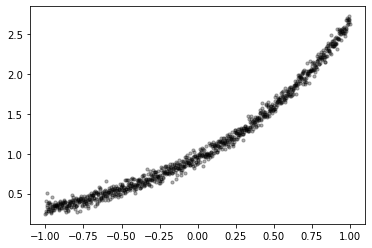

In [14]:
# Экспонента
Y_exp = np.exp(X).reshape(-1, 1) # привести массив к столбчатой структуре
Y_exp= Y_exp+Y_noise
plt.scatter(X, Y_exp, s=markerSize, color="black", alpha=transparencyVal)

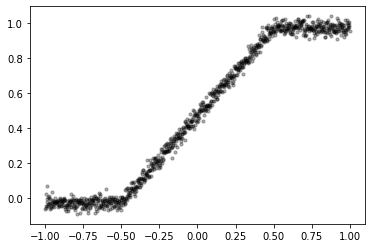

In [65]:
# Линейный с граничными значениями
Y_linstep = np.concatenate([  
        np.zeros( int(X.size * 0.25) ), 
        np.linspace(0., 1., int(X.size * 0.5) ), 
        1. + np.zeros(int(X.size * 0.25) )
        ], 
    ).reshape(-1, 1)# привести массив к столбчатой структуре

Y_linstep= Y_linstep+Y_noise/2
plt.scatter(X, Y_linstep, s=markerSize, color="black", alpha=transparencyVal)

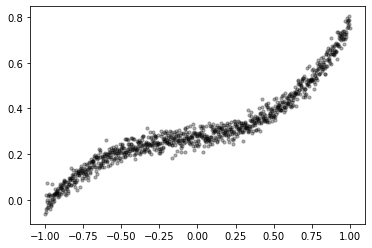

In [15]:
# Полином
Y_polyn = (0.3*(X**3) + 0.1*(X**2) + 0.1 * X + 0.3).reshape(-1, 1) # привести массив к столбчатой структуре
Y_polyn = Y_polyn + Y_noise/2
plt.scatter(X, Y_polyn, s=markerSize, color="black", alpha=transparencyVal)

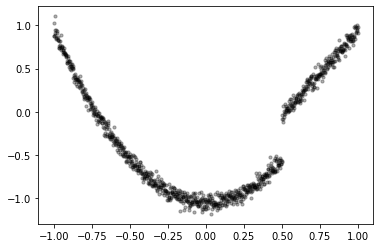

In [16]:
# Парабола
f1 = lambda x: ((x < .5) * np.power(x, 2) + (x > .5) * x) * 2 -1
Y_parabola = f1(X).reshape(-1, 1) # привести массив к столбчатой структуре
Y_parabola = Y_parabola + Y_noise
plt.scatter(X, Y_parabola, s=markerSize, color="black", alpha=transparencyVal)

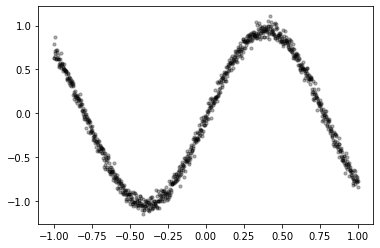

In [17]:
# Синусоида
Y_sin = np.sin(4 * X).reshape(-1, 1) # привести массив к столбчатой структуре
Y_sin= Y_sin+Y_noise
plt.scatter(X, Y_sin, s=markerSize, color="black", alpha=transparencyVal)

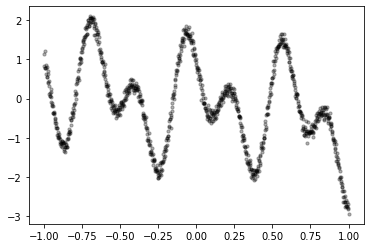

In [60]:
# Наложение циклических
Y_hard = np.cos(X*10)  - 1*np.sin(20*X) - 1*X**3
Y_hard= Y_hard+Y_noise*2
plt.scatter(X, Y_hard, s=markerSize, color="black", alpha=transparencyVal)

Выберем один из наборов данных для демонстрации

In [18]:
x_train = X.copy().reshape(-1,1)    # привести массив к столбчатой структуре
#▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
y_train = Y_parabola.copy().reshape(-1,1) # привести массив к столбчатой структуре
#▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲

Нормализуем исходные данные для приведения всех значений к единой шкале

Text(0.5, 0, 'Объясняющий X')

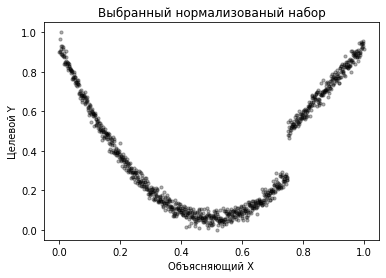

In [19]:
NormalizerX_EXAMPLE = MinMaxScaler().fit(x_train) 
NormalizerY_EXAMPLE = MinMaxScaler().fit(y_train)  
xNorm_train = NormalizerX_EXAMPLE.transform(x_train)
yNorm_train = NormalizerY_EXAMPLE.transform(y_train)

plt.scatter(xNorm_train, yNorm_train, s=markerSize, color="black", alpha=transparencyVal)
plt.title("Выбранный нормализованый набор")
plt.ylabel("Целевой Y")
plt.xlabel("Объясняющий X")

## Структура и параметры

Основным элементом искусственной нейронной сети (ИНС) является формальный нейрон Нейрона формирует выходной сигнал "y" в зависимости от входных сигналов x0,…,xN. Значения входных сигналов могут усиливаться или ослабляться зависимости от величины и знака весовых (передаточных) коэфф. синапсов w0,…,wN.
Взвешенные сигналы суммируются и могут поступать на вход некоторой функции преобразователя - функции активации, которая может иметь линейный, либо разнообразный нелинейный вид. 


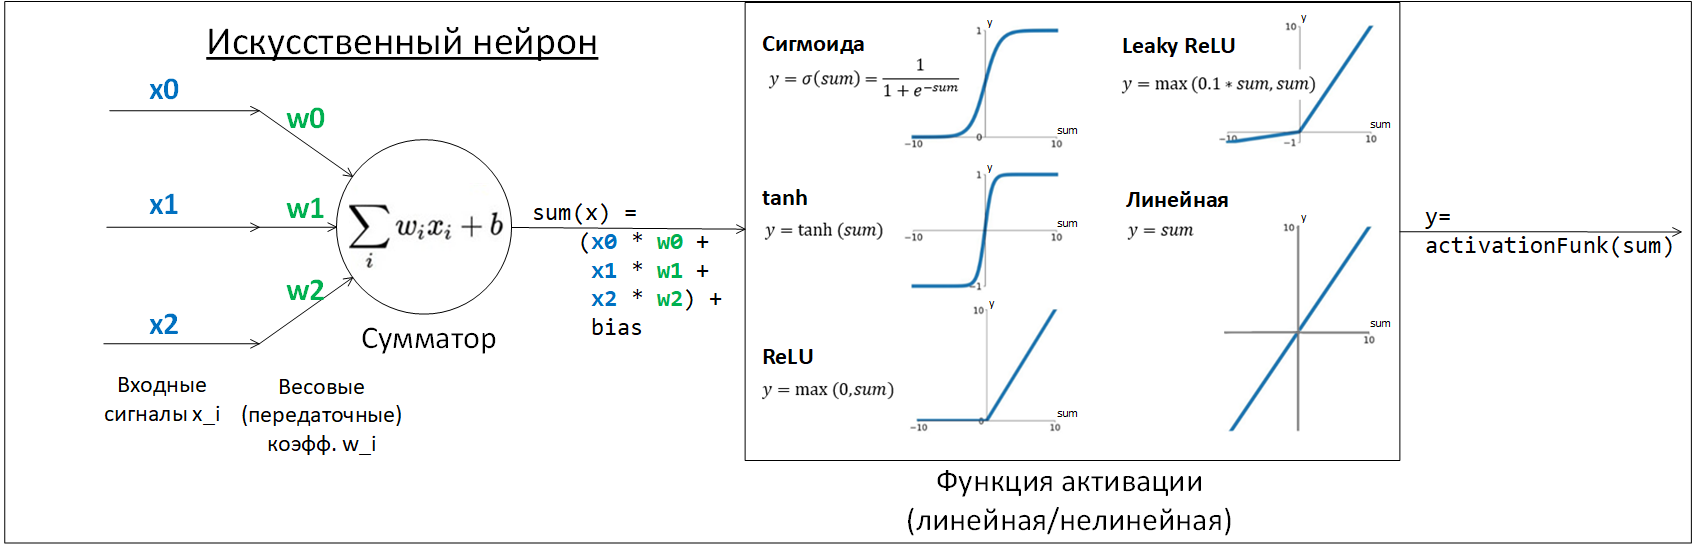

Для решения задачи восстановления числовой зависимости (регрессии) будем использовать ИНС со структурой многослойный перцептрон. В такой структуре сигналы распространяются от входов к выходам и нейроны сгруппированы в слои. При этом соседние слои являются полносвязными, т.е. каждый нейрон из слоя-источника передает сигналы в каждый нейрон-слоя приемника.

Используя таблицу с образцами (определяющие x и зависимый от них y), есть возможность сравнить вычисленные значения y_pred и ожидаемые (проверочные) y_test. Ошибки (разности) между вычисленными и ожидаемыми значениями передают в функцию оценки потеть (loss function) - функцию тем или иным способом вычисляющую единый коэфф. несоответствия.

Используя текущие значения потерь (loss) выбранная функция оптимизации  вычислит поправки к текущим весовым коэфф. w0,…,wN и применит их. Поправки вычисляются таким образом, чтобы минимизировать значения потерь (loss). 

В целом при подходе "обучение с учителем" нейронная сеть итеративно подбирает комбинацию весовых коэфф. такую, чтобы вычисленные ответы были как можно точнее в сравнении с обучающими образцами.

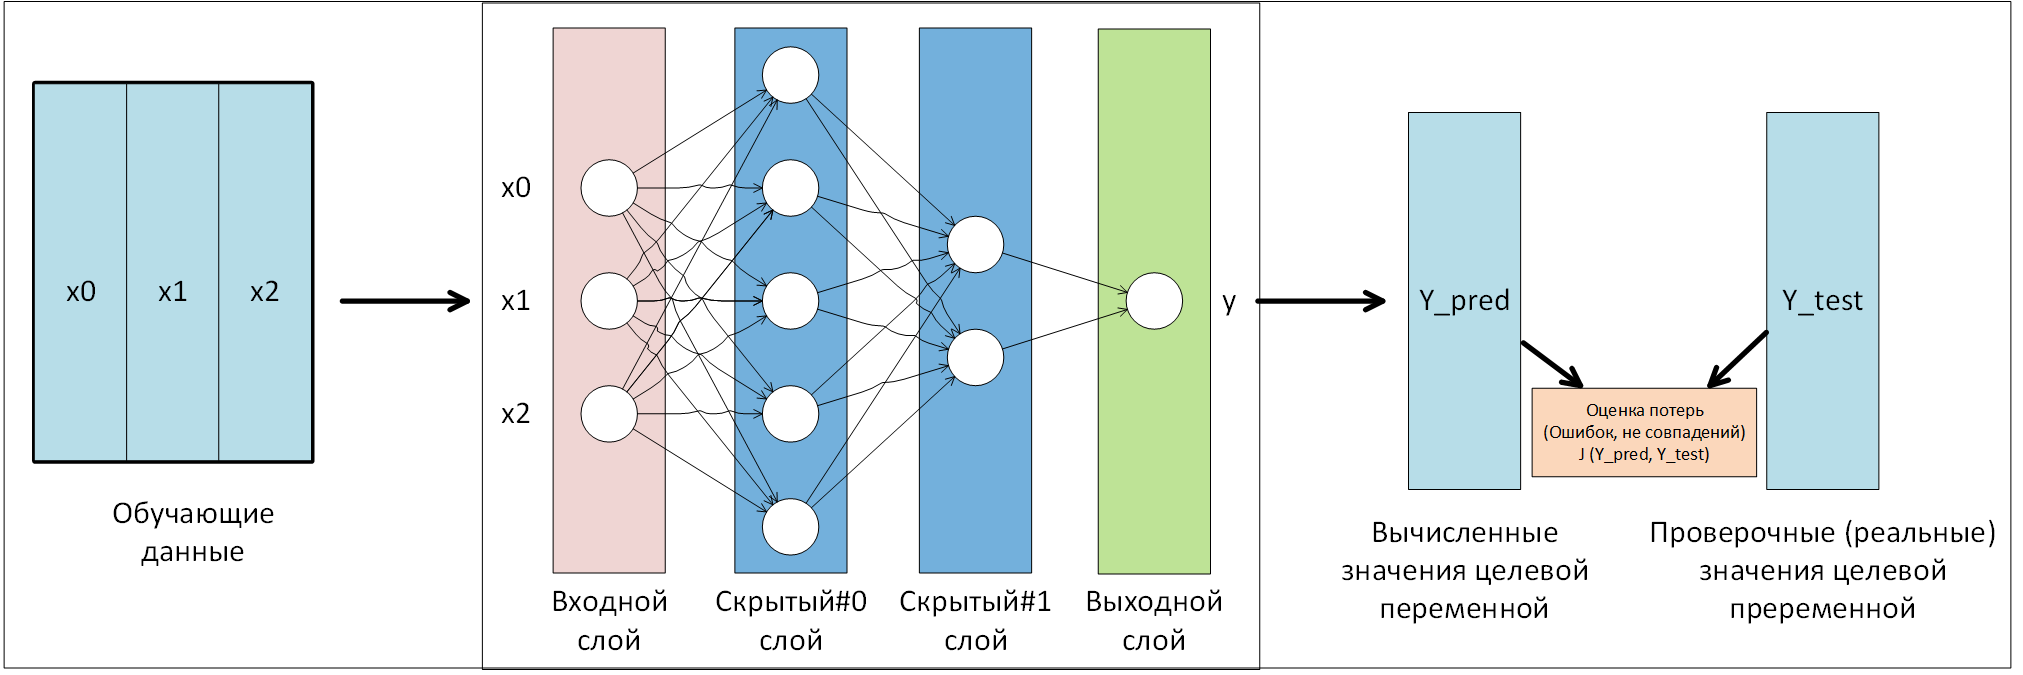

Для создания модели необходимо выбрать следующие параметры:
* Кол-во эпох - повторений для подбора коэфф. нейронов

* Структуру нейронной сети:
  - кол-во входных нейронов = кол-ву "x"
  - кол-во скрытых слоев и нейронов на каждом из них
  - кол-во выходных нейронов = кол-ву "y"

* Нелинейные функции активации для скрытых слоев, при их наличии:

    Некоторые доступные функции активации нейронов:
    - relu(...): Applies the rectified linear unit activation function.
    - elu(...): Exponential Linear Unit.
    - sigmoid(...): Sigmoid activation function, sigmoid(x) = 1 / (1 + exp(-x)).
    - tanh(...): Hyperbolic tangent activation function.
    - linear(...): Linear activation function (pass-through).

    Полный список функций активации смотрите на странице справке https://www.tensorflow.org/api_docs/python/tf/keras/activations


* Функцию оценки потерь (спобоб оценки ошибок между y_pred и y) = Среднеквадратичная ошибка (MSE)

    Доступные функиций оценки потерь смотрите на странице справки https://www.tensorflow.org/api_docs/python/tf/keras/losses


* Функцию оптимизации = Adam или SGD (Стохастический градиентный спуск)

    Доступные функиций активации смотрите на странице справки https://www.tensorflow.org/api_docs/python/tf/keras/optimizers

In [57]:
with tf.device('/CPU:0'):
    
    totalHistoryLossTrain=[] # Вспомогательный список для хранение полной истории обучения
    totalHistoryLossTest=[]  # Вспомогательный список для хранение полной истории обучения
    globalEpochCounter = 1

    ###########################################
    #▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
    # 1) Параметры структуры
    input_size  = 1  # кол-во входных  узлов
    output_size = 1  # кол-во выходных узлов
    hiddenLayer_size  = 100 # кол-во узлов на скрытом слое

    # 2.1) Построение модели нейронной сети
    # Многослойная    
    model = tf.keras.models.Sequential()
    
    model.add(tf.keras.layers.Input(shape=(input_size,))) # Входной слой

    # параметр "units" - кол-во узлов/нейронов на данном слое
    # параметр "activation" - вид функции активации
    model.add(tf.keras.layers.Dense(units=hiddenLayer_size,  activation=tf.keras.activations.relu,  )) # Скрытй слой, полносвязный, с нелинейной функцией активации
    #model.add(tf.keras.layers.Dense(units=20,  activation=tf.keras.activations.sigmoid,  ))  # Скрытй слой, полносвязный, с нелинейной функцией активации
    #...

    model.add(tf.keras.layers.Dense(units=output_size,  activation=tf.keras.activations.linear)) # Выходной слой, с линейной функцией активации
    
    
    # 2.2) Ф. потерь и оптимизации
    fLoss     =tf.keras.losses.mean_squared_error
    #fOptimizer=tf.keras.optimizers.SGD(learning_rate=0.01)
    fOptimizer=tf.keras.optimizers.Adam(learning_rate=0.01)
    fMetric  =[tf.keras.losses.mean_squared_error]
    
    model.compile(
        loss      =fLoss, 
        optimizer =fOptimizer, 
        metrics   =[ fMetric ]
    )   
    
    print(model.summary())
    #▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲
    ###########################################

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 100)               200       
                                                                 
 dense_17 (Dense)            (None, 1)                 101       
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________
None


## Первичное и дополнительное обучение 

В процессе обучения будем получать вычисленные значения целевой переменной и строить график функции соответсвующий текущему состоянию нейронной сети. Примеры изменения графиков представлены ниже.

|Синусоида|Парабола|Полином|
|-|-|-|
|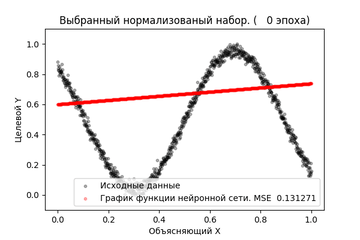|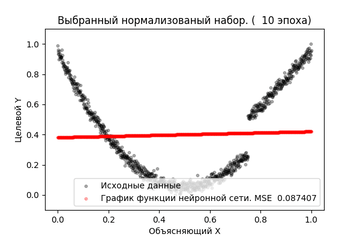|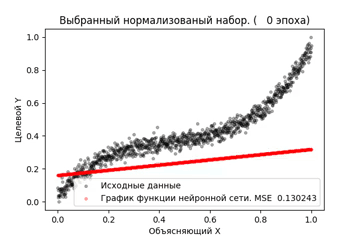|




Далее следует выполнить несколько циклов обучения (подстройки коэфф. каждого узла-нейрона) модели.

currEpochNum: 200/200


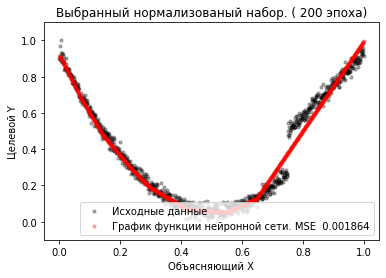

In [58]:
with tf.device('/CPU:0'):
    # В целях наглядной демонстрации количество эпох метода fit сокращено до "1", а значение batch_size увеличено до "100"
    epochForTrain = 200

    for currEpochNum in range(1, epochForTrain+1):

        # 3) Цикл обучения/продолжения обучения сети             
        # xNorm_train, xNorm_test, yNorm_train, yNorm_test 
        history = model.fit(
            xNorm_train,  # обучающие X
            yNorm_train,  # обучающие Y
            #validation_data=(xNorm_test, yNorm_test), # опционально проверочные X и Y
            epochs=1,   # кол-во эпох обучения
            batch_size=100, # кол-во образцов в каждой эпохе
            verbose=1,
        )

        # Только в условиях ЕДИНСТВЕННОГО x: Каждые N эпох выводить график текущей функции НС 
        if xNorm_train.shape[1] == 1: 
            if (currEpochNum) % 10 == 0:
                yNorm_pred = model.predict(xNorm_train)

                clear_output() # очистить окно вывода wait=False
                clear_output(wait=True) # очистить окно вывода
                print('currEpochNum: {}/{}'.format(currEpochNum, epochForTrain ))
                plt.figure()
                plt.scatter(xNorm_train, yNorm_train,  s=markerSize, color="black", alpha=transparencyVal, label =  "Исходные данные")
                plt.scatter(xNorm_train, yNorm_pred,   s=markerSize, color="red",   alpha=transparencyVal, label = f"График функции нейронной сети. MSE {history.history['loss'][-1]:>9.6f}")

                plt.title(f"Выбранный нормализованый набор. ({globalEpochCounter:>4} эпоха)")
                plt.ylabel("Целевой Y")
                plt.xlabel("Объясняющий X")
                plt.ylim( (-0.1, 1.1))
                plt.legend(loc='lower right')
                plt.pause(0.02) # временная пауза для отображения графика
                
        globalEpochCounter+=1

        # дополнение полной истории обучения 
        totalHistoryLossTrain.extend(history.history['loss'])
        if 'val_loss' in history.history.keys():
            totalHistoryLossTest.extend(history.history['val_loss'])

## Оценка точности

Text(0.5, 0, 'Эпохи обучения')

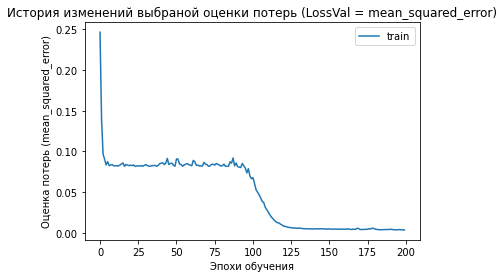

In [54]:
plt.plot(totalHistoryLossTrain, label='train')
if 'val_loss' in history.history.keys():
    plt.plot(totalHistoryLossTest, label='test')
plt.legend()
plt.title("История изменений выбраной оценки потерь (LossVal = mean_squared_error)")
plt.ylabel("Оценка потерь (mean_squared_error)")
plt.xlabel("Эпохи обучения")
###plt.ylim ( (0, 0.03) ) # область видимости для оси "Оценки потерь"

In [55]:
# Осмотрим последнии значения выбраной оценки потерь (LossVal = mean_squared_error)
totalHistoryLossTrain[-5:]

[0.0038529892917722464,
 0.0038873429875820875,
 0.0035903286188840866,
 0.0036199484020471573,
 0.0035179052501916885]

<font color='red'>
Внимание! Для сокращения кода обучение и оценка точности проводится на одном и том же наборе данных xNorm_train, что не отображает реальную обобщающее свойство модели. При выполнении основной части вам необходимо проводить оценку точности на проверочной части xNorm_test.
</font>

32/32 [==============================] - 0s 1ms/step
MAE :     0.049 (средняя абсолютная ошибка)
MSE :  0.003593 (среднеквадратичная ошибка)
RMSE:  0.059942 (кв. корень из среднеквадратичной ошибки)
R2  :     0.957 (коэфф. детерминации)


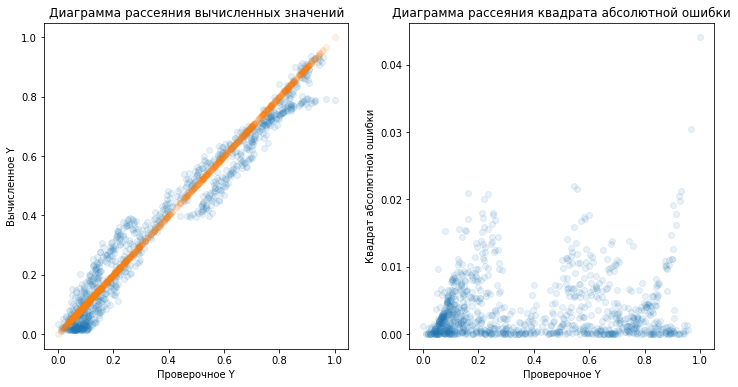

In [56]:
with tf.device('/CPU:0'):
    # Calculate predictions
    yNorm_pred = model.predict(xNorm_train)

GET_METRICS_SINGLE(yNorm_train, yNorm_pred)
PLOT34(yNorm_train, yNorm_pred)

# Загрузка данных

## Загрузка подготовленных данных
<b> Путь вида "../datasets/melbourne_data_PREPARED.csv" подразумевает следующее расположение файлов:
```
WorkDir/
├─ datasets/
│  └─ melbourne_data_PREPARED.csv
│ 
├─ 3. ЛР-3.ipynb
```
</b> 

Для сохранения данных в ЛР-1,2 используйте команду
```
   data.to_csv('./путь/имя_файла.csv', index=False), где:
     './путь/имя_файла.csv' - абсолютный или относительный путь к новому файлу;
     index=False - значение параметра для исключения столбца с идентификаторами.
```

In [ ]:
df = pd.read_csv('./datasets/melbourne_data_PREPARED.csv', # путь к файлу, (используй автодотолнение)
                   sep=',', # разделитель данных в файле
                   header=0, # номер строки с заголовками, нумерация с нуля
                   # header='None', # если заголовки отсутствуют
                  )
print("Размер таблицы", df.shape)
df[:2]

In [ ]:
features = ['Rooms', 'YearBuilt', 'Landsize',  'Type_h', 'BuildingArea']
target   = ['Price']

# Приведение к новой единой шкале. Нормализация

## Выделение X и Y

Для выполнения следующих шагов разделим исходую таблицу на две отдельных
  - dfX содержащую только объясняющие признаки
  - dfY содержащую только целевой объясняемый признак

In [ ]:
dfX = df[features]
print("Размер таблицы", dfX.shape)
dfX[:2]

In [ ]:
dfY = df[target]
print("Размер таблицы", dfY.shape)
dfY[:2]

## Использование класса MinMaxScaler

В библиотеке sklearn, для выполнения процедуры нормализации, присутствует более удобный класс __sklearn.preprocessing.MinMaxScaler__, который содержит методы:

- __MinMaxScaler.fit(  df  )__ - вычисление значений __минимального__, __максимального значений__ и __диапазонна__ 

- __MinMaxScaler.transform( df )__ - прямого преобразования из истинного значения к приведенному

- __MinMaxScaler.inverse_transform( df )__ - обратного преобразования из приведенного значения в истинное

In [ ]:
scalerNormX = MinMaxScaler()
scalerNormX.fit(dfX)

dfXNorm = pd.DataFrame (
  data    = scalerNormX.transform(dfX), # значения ячеек    <<--
  columns = dfX.columns,           # названия столбцов
  index   = dfX.index              # идентификаторы строк
)
print("Размер таблицы", dfXNorm.shape)
dfXNorm[:2]

In [ ]:
scalerNormY = MinMaxScaler()
scalerNormY.fit(dfY)

dfYNorm = pd.DataFrame (
  data    = scalerNormY.transform(dfY), # значения ячеек    <<--
  columns = dfY.columns,           # названия столбцов
  index   = dfY.index              # идентификаторы строк
)
print("Размер таблицы", dfYNorm.shape)
dfYNorm[:2]

## Проверка

In [ ]:
 dfXNorm.describe().loc[["min", "max" ]]

In [ ]:
 dfYNorm.describe().loc[["min", "max" ]]

In [ ]:
for i, colName in enumerate(dfXNorm.columns ):
    plt.figure(figsize=(15, 2))
    
    plt.subplot(1, 2, 1)
    plt.hist(df[colName], bins=50)
    plt.title(colName)
    
    plt.subplot(1, 2, 2)
    plt.hist(dfXNorm[colName], bins=50)
    plt.title(colName+"_Norm")

# Формирование тренировочной и проверочной выборок

In [ ]:
valid_size = 0.3 # доля тестовой части в выборке
rand_seed = 8 # начальное состояние генератора случ. чисел

## Нормализованые

In [ ]:
xNorm_train, xNorm_test, yNorm_train, yNorm_test =  train_test_split(
    dfXNorm[features], # исходные данные X
    dfYNorm[target],   # исходные данные y
    
    test_size    = valid_size, # доля тестовой части в выборке
    random_state =rand_seed,   # начальное состояние генератора случ. чисел
    shuffle=True               # перемешивание
) 

In [ ]:
xNorm_train[:2]

In [ ]:
yNorm_train[:2]

# Нейронная сеть m1. Построение модели без скрытых слоев от ДВУХ "x" (2->1)

## Структура и параметры

In [ ]:
with tf.device('/CPU:0'):
    
    totalHistoryLossTrain=[] # Вспомогательный список для хранение полной истории обучения
    totalHistoryLossTest=[]  # Вспомогательный список для хранение полной истории обучения
    
    ###########################################
    #▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
    # 1) Параметры структуры
    input_size  = 2  # кол-во входных  узлов
    output_size = 1  # кол-во выходных узлов
    ###hiddenLayer_size  = 10 # кол-во узлов на скрытом слое

    # 2.1) Построение модели нейронной сети
    # Многослойная    
    model = tf.keras.models.Sequential()
    
    model.add(tf.keras.layers.Input(shape=(input_size,))) # Входной слой
    # параметр "units" - кол-во узлов/нейронов на данном слое
    # параметр "activation" - вид функции активации
    #...

    model.add(tf.keras.layers.Dense(units=output_size,  activation=tf.keras.activations.linear)) # Выходной слой, с линейной функцией активации
    
    
    # 2.2) Ф. потерь и оптимизации
    fLoss     =tf.keras.losses.mean_squared_error
    #fOptimizer=tf.keras.optimizers.SGD(learning_rate=0.01)
    fOptimizer=tf.keras.optimizers.Adam(learning_rate=0.01)
    fMetric  =[tf.keras.losses.mean_squared_error]
    
    model.compile(
        loss      =fLoss, 
        optimizer =fOptimizer, 
        metrics   =[ fMetric ]
    )   
    
    print(model.summary())
    #▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲▲
    ###########################################

## Первичное и дополнительное обучение 

In [ ]:
# Получим используемые для обучения столбцы исходной таблицы
xNorm_train [["BuildingArea", "YearBuilt", ]].head(5) 

In [ ]:
epochForTrain = 100

with tf.device('/CPU:0'):
    # 3) Цикл обучения/продолжения обучения сети             
    # xNorm_train, xNorm_test, yNorm_train, yNorm_test 
    history = model.fit(
        
        xNorm_train [["BuildingArea", "YearBuilt", ]],  # обучающие X  # требуется передать таблицу с кол-ом столбцов равным кол-ву входных нейронов
        yNorm_train,  # обучающие Y

        validation_data=(  # опционально: проверочные X и Y
            xNorm_test [["BuildingArea", "YearBuilt", ]],  # требуется передать таблицу с кол-ом столбцов равным кол-ву входных нейронов
             yNorm_test), 

        epochs=epochForTrain,   # кол-во эпох обучения
        #batch_size=100, # кол-во образцов в каждой эпохе
        verbose=1,
    )
    
    totalHistoryLossTrain.extend(history.history['loss'])
    if 'val_loss' in history.history.keys():
        totalHistoryLossTest.extend(history.history['val_loss'])

In [ ]:
history.history.keys()

## Оценка точности

In [ ]:
plt.plot(totalHistoryLossTrain, label='train')
if 'val_loss' in history.history.keys():
    plt.plot(totalHistoryLossTest, label='test')
plt.legend()
plt.title("История изменений выбраной оценки потерь (LossVal = mean_squared_error)")
plt.ylabel("Оценка потерь (mean_squared_error)")
plt.xlabel("Эпохи обучения")
###plt.ylim ( (0, 0.03) ) # область видимости для оси "Оценки потерь"

In [ ]:
# Осмотрим последнии значения выбраной оценки потерь (LossVal = mean_squared_error)
totalHistoryLossTrain[-5:]

In [ ]:
# create model
with tf.device('/CPU:0'):
    # Calculate predictions
    yNorm_pred = model.predict( xNorm_test [["BuildingArea", "YearBuilt",]] ) # требуется передать таблицу с кол-ом столбцов равным кол-ву входных нейронов

GET_METRICS_SINGLE(yNorm_test, yNorm_pred)
PLOT34(yNorm_test, yNorm_pred)

## Получение весовых коэфф. w_i и bias для модели m1 (2->1)

In [ ]:
# Осмотр весовых коэфф.  
for layer in model.layers:
  print(f"\nИмя слоя:{layer.name};  Тип слоя: {layer} ------------------------------------")
  print(f"\nВесовые коэфф. w_i  ") 
  print(layer.weights[0].numpy())
  print(f"\nВесовой коэфф. bias {layer.bias.numpy()}")

## Построение 3d графика зависимости вычисленных значений Y_pred от объясняющих признаков x1 и x2

In [ ]:
my3dplot(
    xNorm_train, yNorm_train,  not True,
    xNorm_test,  yNorm_test,   True, 
    yNorm_pred,                True, 
    "BuildingArea",  "YearBuilt", *target)

# Нейронная сеть m2. Построение модели со скрытыми слоями от ДВУХ "x" (2->...->...->1)

In [ ]:
# ваш код ...

# Нейронная сеть m3. Построение модели без скрытых слоев от множества "x" (пример 5->1)

In [ ]:
# ваш код ...

# Нейронная сеть m4. Построение модели со скрытыми слоями от множества "x"  (пример: 5->...->...->1)

In [ ]:
# ваш код ...

# Сравнение полученных моделей

In [ ]:
ddf = pd.DataFrame (
    [
        ["x1",     "2->1",          1000, 0,  0],
        ["x1,x2",  "2->...->...->1",1000, 0,  0],
        ["Все",    "5->1",          1000, 0,  0],
        ["Все",    "5->...->...->1",1000, 0,  0],
    ],
    columns= ["Признаки", "Структура", "ЭпохОбучения", "R2", "RMSE" ],
 )
ddf

# Выводы по работе

- Как в целом влияет структура модели (кол-во слоев и количество нейронов на каждом слое):
  - на итоговую точность модели?
  - на время необходимое для получение приемлимых результатов?
- Оцените эффективность применения нейронных сетей на вашем наборе данных
- Сравните точность модлей m3 и m4 и сделайте предположения о причинах совпадения/различия точности